In [37]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

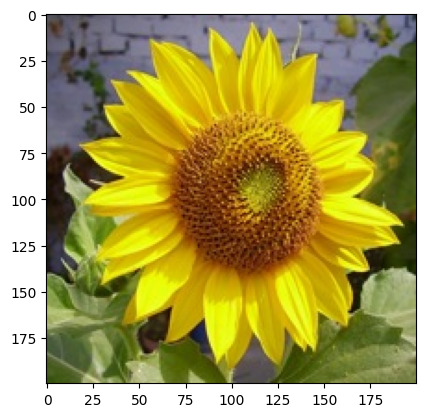

In [38]:
img = cv2.cvtColor(cv2.imread("../../data/sunflower.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [39]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.2], out, img) #X,Y,r,R,G,B,alpha

13142588

In [40]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [41]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

# Our Differential Evolution

In [42]:
from differential_evolution import differential_evolution

In [43]:
# nIter, out = 300, np.zeros_like(img)
# for i in range(nIter):
#     r = differential_evolution(objective_function, bounds, args = (out, img), popSize=100, cR = 0.5, nGen = 100)
#     if i % (nIter // 5):
#         draw_circle(r["P"], out)
#     else:
#         print(i, r)
#         draw_circle(r["P"], out, True)
# plt.imshow(img)
# plt.imshow(out)

# Scipy Differential Evolution

In [44]:
from scipy.optimize import differential_evolution

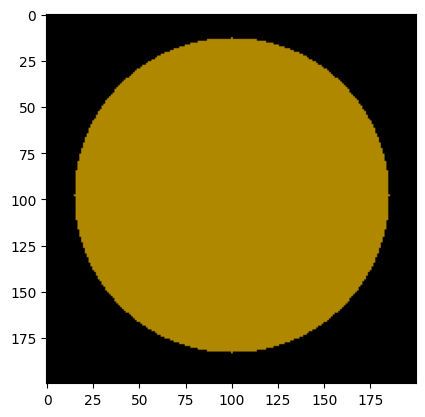

0      fun: 9973155.0
 message: 'Optimization terminated successfully.'
    nfev: 42008
     nit: 59
 success: True
       x: array([100.31230814,  98.99632733,  85.00274645, 239.22851296,
       184.19110675,   0.4566486 ,   0.73654586])


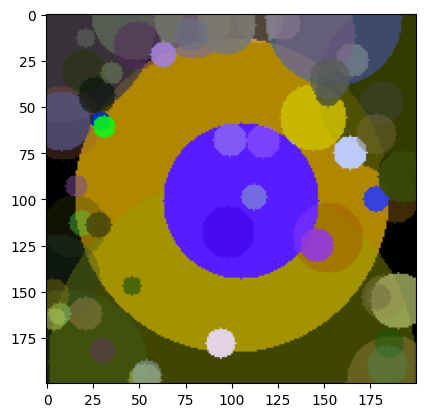

60      fun: 6000769.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([ 78.63683244,  11.4463127 ,   9.63547753, 103.81391093,
       111.14064523, 130.97590577,   0.64872394])


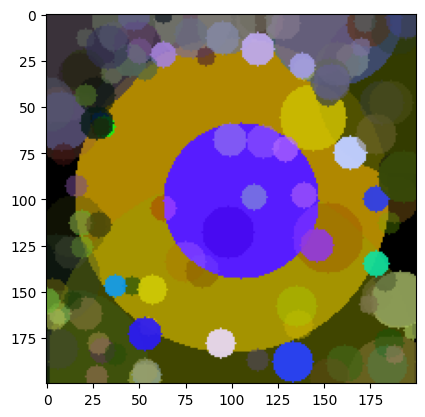

120      fun: 5596760.0
 message: 'Optimization terminated successfully.'
    nfev: 7008
     nit: 9
 success: True
       x: array([174.40424993, 157.98171513,   5.99565583, 122.77212413,
       115.96390626,  73.16750487,   0.79774104])


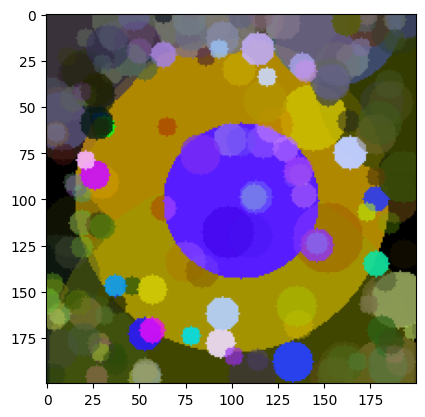

180      fun: 5338361.0
 message: 'Optimization terminated successfully.'
    nfev: 7008
     nit: 9
 success: True
       x: array([136.94943203,  85.80643939,   8.88965085, 161.47486112,
        65.98945336, 248.65364923,   0.73193162])


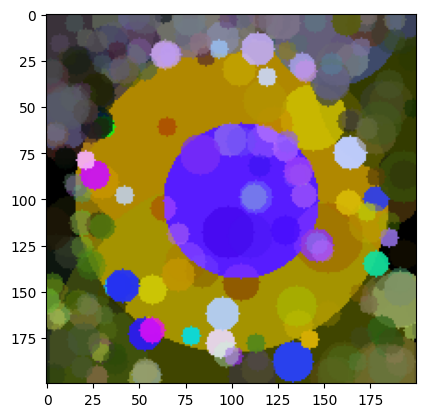

240      fun: 5150325.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([129.75482179, 117.95397831,   8.12121435,  70.38535746,
        11.39155488, 252.32139041,   0.7725877 ])


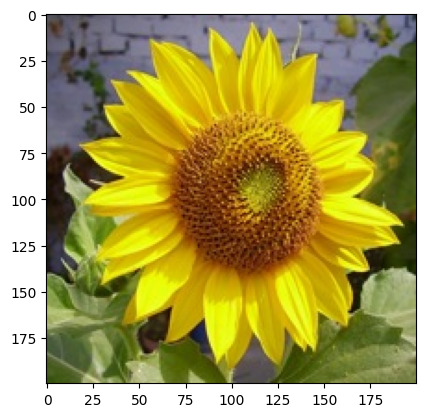

In [45]:
nIter, out = 300, np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // 5): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)
plt.imshow(img)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.